In [1]:
# Importing the required libraries for data manipulation
import numpy as np
import pandas as pd

# Importing the required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the required libraries for ignoring he warnings
import warnings
warnings.simplefilter(action= "ignore")

In [2]:
# Reading the CSV file with header and index_col as 0
df = pd.read_csv("E:\\KES SHROFF COLLEGE\\THIRD YEAR\\Semester - 06\\Unsupervised_Learning\\Mall_Customers.csv" , 
                 index_col=0 , header = 0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Exploratory Data Analysis

In [3]:
# Checking the shape of the dataset
df.shape

(200, 4)

In [4]:
"""
2 types of statistics
descriptive: - We land on a value or we generate a value
inferential: - We generate a statement
"""

'\n2 types of statistics\ndescriptive: - We land on a value or we generate a value\ninferential: - We generate a statement\n'

In [5]:
# Checking the aggregate functions for all numerical columns
df.describe()

# data.describe(include="all") Includes categorical column too

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Checking the null values in the columns of the dataset
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Creating x variable

In [7]:
# Selection of data in the independent variable as 'x'
x = df.values[ : , [2,3]]
x[:5]

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40]], dtype=object)

In [8]:
# Using the elbow method to find the optimal number of clusters 

from sklearn.cluster import KMeans

wsse = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i,random_state = 10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)     # interia means how well the cluster is made.
    
    
plt.plot(range(1,11),wsse)
# plt.scatter(range(1,11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')
plt.xlim(1,10)                      # will plot every value from 1 to 10 on x axis
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
print(wsse)

### Fitting KMeans to the dataset

In [9]:
kmeans = KMeans(n_clusters=5,random_state=10)
y_pred = kmeans.fit_predict(x)

# It means .fit(x) --> Train
# y_pred = kmeans.predict(x) --> Predicting

y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [10]:
kmeans.inertia_

44448.45544793371

In [11]:
kmeans.n_iter_

5

### Allocating Cluster number to the observations

In [12]:
df['Clusters'] = y_pred
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,4
198,Male,32,126,74,2


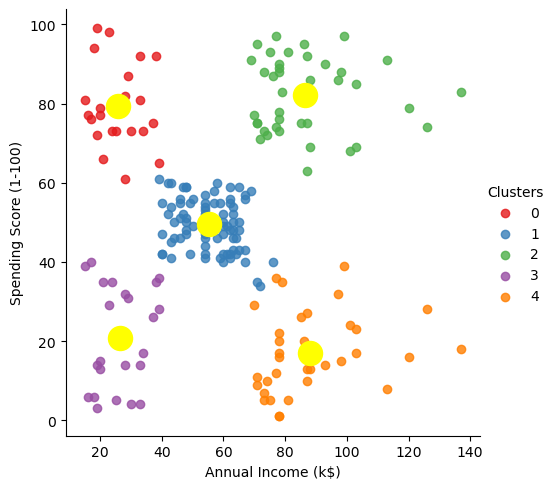

In [13]:
sns.lmplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Clusters', palette = 'Set1', fit_reg = False)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow')

In [14]:
kmeans.cluster_centers_[:,0]

array([25.72727273, 55.2962963 , 86.53846154, 26.30434783, 88.2       ])

In [15]:
kmeans.cluster_centers_[:,1]

array([79.36363636, 49.51851852, 82.12820513, 20.91304348, 17.11428571])

In [16]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [17]:
df['Clusters'] = df.Clusters.map({1:'Standard',2:'Target',3:'Sensible',0:'Careless',4:'Careful'})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible
...,...,...,...,...,...
196,Female,35,120,79,Target
197,Female,45,126,28,Careful
198,Male,32,126,74,Target
